# HCS Bootcamp 1: Facebook Messenger Program

Description:
1. Tallies the tables at Annenburg that we have been at based on the table numbers.
2. Calculates the amount of interactions between a selected user and the rest of the people in the chat.

Created By: Bryan Lee, Austin Hwang, Victor Qin

In [62]:
import pylab as pl
import numpy as np
import time
import re
tables = {}

from datetime import datetime, date, timedelta
from collections import Counter

%matplotlib inline

from lxml import etree
parser = etree.XMLParser(recover=True)

# change the file name here!!

# uncomment the below for project 1
tree = etree.parse('messages.htm',parser=parser)
root = tree.getroot()

In [63]:
# Helper function to filter out tags of a certain class
def filter_class(root, tag, class_):
    results = [] 
    for div in root.findall(tag): #finds all of type tag
        if 'class' in div.attrib and div.attrib['class'] == class_: #accesses a DICTIONARY
            results.append(div)
    if len(results) == 1: 
        return results[0] # returns a LIST
    else: 
        return results # returns a LIST

In [64]:
body = root.find('body') # finds an HTML body tag from the root

#outputs one div element
contents = filter_class(body, 'div', 'contents').find('div') # apparently div class has many attributes (nav, contents, footer, thread)

# finds elements in the 'contents' list with tag 'div' and 'class'='thread'
# finds all of the chats
chats = filter_class(contents, 'div', 'thread') 

In [65]:
# 
# chat_num = a chat thread
#
interactions_counter= []
names = []

def getChatInfo(chat_num):
    
    # counts interactions between each pair of people
    # list of Counters
    global interactions_counter
    global names
    
    cur_user = ''
    previous_user = ''
    first = True 
    
    # message = individual messages in the chat
    for message in chat_num:
        if message.tag == 'div':
            cur_user = message.find('div').find('span').text
            
            # if not already in the list, add cur_user to list of users 
            if cur_user not in names:
                names.append(cur_user)
                interactions_counter.append(Counter())
                
            if first:
                first = False
                previous_user = cur_user
            elif previous_user != cur_user:
                prev_index = names.index(previous_user)
                cur_index = names.index(cur_user)
                interactions_counter[prev_index][cur_user] += 1
                interactions_counter[cur_index][previous_user] += 1
                previous_user = cur_user
                #print interactions_counter[prev_index][cur_user]
            
        elif message.tag == 'p' and cur_user != None:
            if message.text == None:
                continue
            table = re.search('[abcABC]{1}[1]{1}[0-7]{1}|[abcABC]{1}[1-9]{1}', message.text.lower())
            if(table):
                if(table.group() in tables):
                    tables[table.group()] += 1
                else:
                    tables.update({table.group() : 1})      
            

    return interactions_counter, names
    


In [66]:
names

[]

In [67]:
getChatInfo(chats[46])

([Counter({'Andy Fan': 1, 'Austin Hwang': 1, 'Victor Qin': 5}),
  Counter({'Ana Yee': 18,
           'Andy Fan': 53,
           'Austin Hwang': 51,
           'Belinda Hu': 1,
           'Bryan Lee': 15,
           'Jessica Luo': 2,
           'Jessica Zhang': 59,
           'Joseph Sanchez': 42,
           'Justin Zhu': 1,
           'Karissa Huang': 86,
           'Lin Zhu': 18,
           'Lina Ghosh': 24,
           'Manasi Maheshwari': 1,
           'Oliver York': 17,
           'Ryan Rose': 38,
           'Sarah Hong': 37,
           'Tristan Yang': 5,
           'Wesley Shin': 2}),
  Counter({'Ana Yee': 3,
           'Andy Fan': 17,
           'Bryan Lee': 10,
           'Jessica Zhang': 28,
           'Joseph Sanchez': 25,
           'Karissa Huang': 52,
           'Lin Zhu': 11,
           'Lina Ghosh': 2,
           'Oliver York': 17,
           'Ryan Rose': 23,
           'Sarah Hong': 20,
           'Tristan Yang': 1,
           'Victor Qin': 51,
           'Yuke Zheng': 2}

In [68]:
# makes 1 plot: number of chat responses a person has with each person in chat
def plot(chat_number, name):
    interactions_counter, names = getChatInfo(chats[chat_number])
    nameIndex = names.index(name)
    X = np.arange(len(interactions_counter[nameIndex]))
    pl.bar(X, np.array(interactions_counter[nameIndex].values()), align='center', width=0.5, color = 'r')
    pl.xticks(X, interactions_counter[nameIndex].keys(), rotation = 90)
    pl.title(name + ': Number of Interactions')
    pl.show

a10: 4
a13: 2
a14: 4
a16: 2
a3: 2
a5: 2
a7: 4
a9: 2
b10: 6
b12: 2
b14: 2
b15: 4
b2: 2
b3: 2
b6: 2
b7: 4
b8: 2
b9: 2
c10: 14
c11: 4
c12: 2
c17: 2
c5: 2
c7: 6
c8: 4
c9: 2


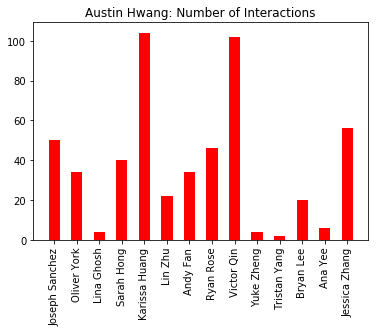

In [69]:
plot(46, 'Austin Hwang')

for key in sorted(tables):
    print "%s: %s" % (key, tables[key])